In [11]:
!pip install pandas networkx matplotlib scikit-learn tqdm node2vec transformers numpy

In [20]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
from node2vec import Node2Vec
from transformers import BertTokenizer, BertModel


In [2]:
# Load the CSV file
file_path = 'Book1.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in 'Authors' column
data = data.dropna(subset=['Authors'])

# Filter out rows with 'TBA' in 'Authors' or 'Title' columns
data = data[~data['Authors'].str.contains('TBA', na=False)]
data = data[~data['Title'].str.contains('TBA', na=False)]

# Select the first 100 entries from the dataset
sampled_data = data.head(100) # Remove this paret of code to use full dataset

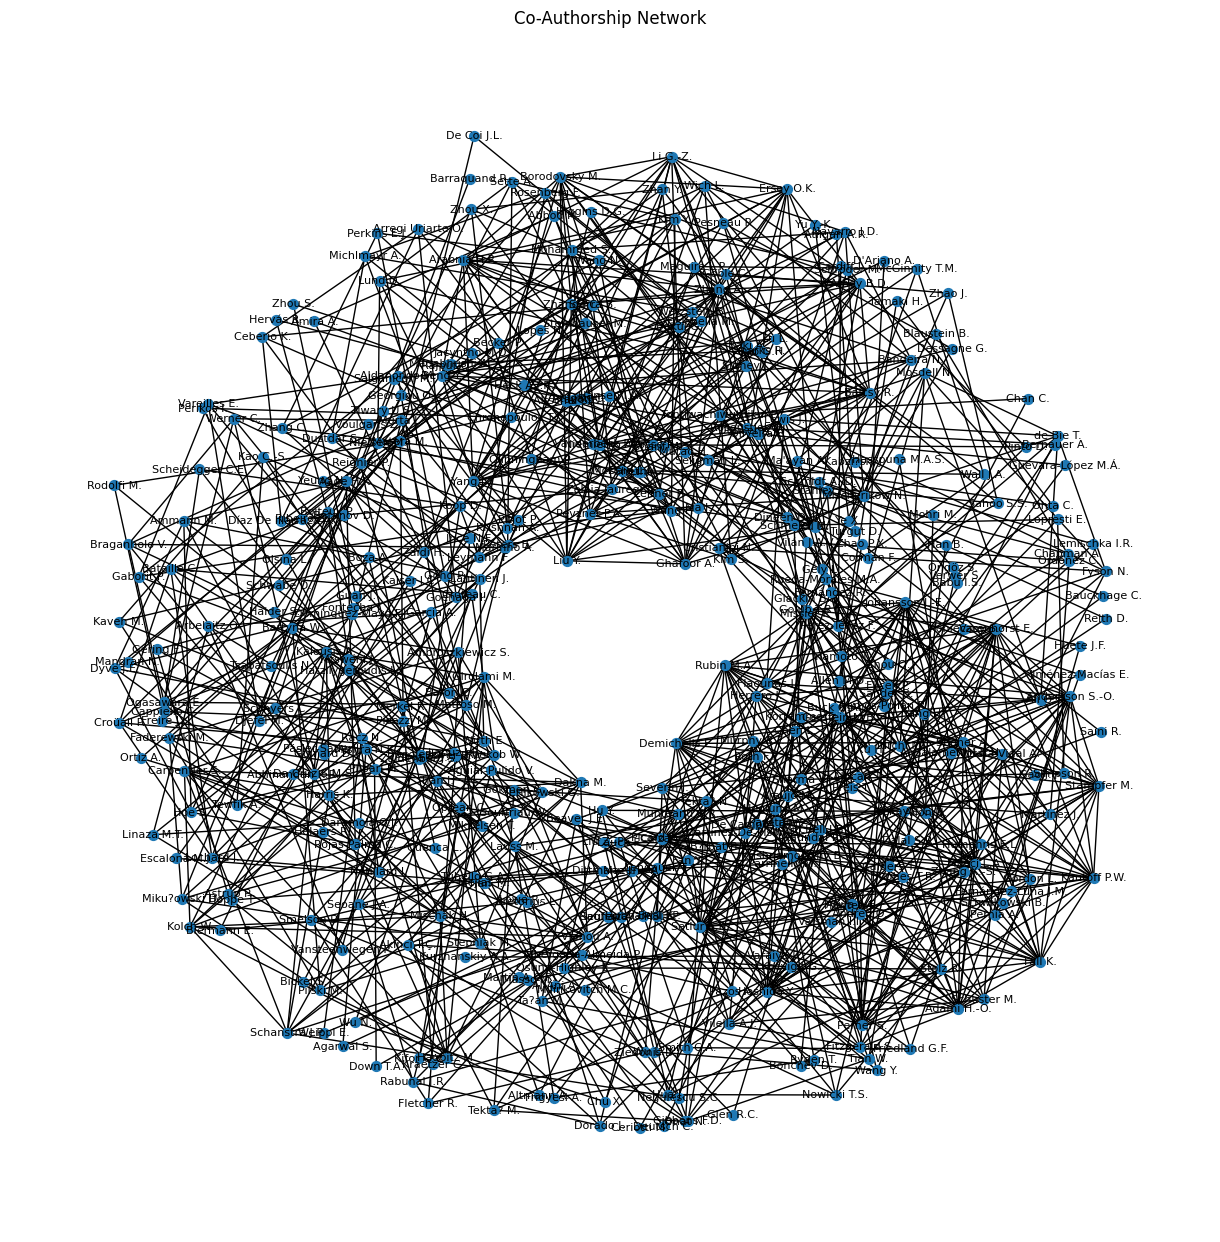

In [3]:
# Initialize the graph
G = nx.Graph()

# Iterate through each row in the DataFrame
for index, row in sampled_data.iterrows(): #Change to 'data' when having full dataset
    authors_str = str(row['Authors']).strip()
    if authors_str == '':
        continue  # Skip empty authors field

    authors = [author.strip() for author in authors_str.split(',')]  # Handle potential NaN values
    paper_title = row['Title']

    # Add nodes (authors)
    for author in authors:
        if pd.isna(author) or author == 'TBA':
            continue  # Skip NaN values or 'TBA'
        G.add_node(author)

    # Add edges between authors based on paper title
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j], paper_title=paper_title)

# Visualize the graph structure
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title('Co-Authorship Network')
plt.show()

In [5]:
# Network metrics calculations
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 authors by degree centrality:", top_degree)

betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 authors by betweenness centrality:", top_betweenness)

closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 authors by closeness centrality:", top_closeness)

eigenvector_centrality = nx.eigenvector_centrality(G)
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 authors by eigenvector centrality:", top_eigenvector)

clustering_coefficient = nx.clustering(G)
average_clustering = nx.average_clustering(G)
print("Average clustering coefficient:", average_clustering)

connected_components = list(nx.connected_components(G))
largest_component = max(connected_components, key=len)
print("Number of connected components:", len(connected_components))
print("Size of largest component:", len(largest_component))

# Advanced Graph Metrics
pagerank = nx.pagerank(G)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 authors by PageRank:", top_pagerank)

core_number = nx.core_number(G)
top_core_number = sorted(core_number.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 authors by Core Number:", top_core_number)

Top 10 authors by degree centrality: [('Sboner A.', 0.046153846153846156), ('Demichelis F.', 0.046153846153846156), ('Calza S.', 0.046153846153846156), ('Pawitan Y.', 0.046153846153846156), ('Setlur S.R.', 0.046153846153846156), ('Hoshida Y.', 0.046153846153846156), ('Perner S.', 0.046153846153846156), ('Adami H.-O.', 0.046153846153846156), ('Fall K.', 0.046153846153846156), ('Mucci L.A.', 0.046153846153846156)]
Top 10 authors by betweenness centrality: [('Xu D.', 0.00018456265242897634), ('Matera M.', 7.909827961241843e-05), ('Reignier P.', 2.6366093204139476e-05), ('Sharma V.', 0.0), ('Simpson R.', 0.0), ('Lopresti E.', 0.0), ('Schmeler M.', 0.0), ('Preis T.', 0.0), ('Reith D.', 0.0), ('Stanley H.E.', 0.0)]
Top 10 authors by closeness centrality: [('Sboner A.', 0.046153846153846156), ('Demichelis F.', 0.046153846153846156), ('Calza S.', 0.046153846153846156), ('Pawitan Y.', 0.046153846153846156), ('Setlur S.R.', 0.046153846153846156), ('Hoshida Y.', 0.046153846153846156), ('Perner S.

In [6]:
# Network metrics for top 10 nodes by degree centrality
top_nodes = [author for author, _ in top_degree]
for i, author1 in enumerate(top_nodes):
    for author2 in top_nodes[i + 1:]:
        if G.has_edge(author1, author2):
            common_neighbors = list(nx.common_neighbors(G, author1, author2))
            if common_neighbors:
                print(f"Common neighbors between '{author1}' and '{author2}':", common_neighbors[:5])

            jaccard_coefficient = list(nx.jaccard_coefficient(G, [(author1, author2)]))
            if jaccard_coefficient:
                print(f"Jaccard Coefficient between '{author1}' and '{author2}':", jaccard_coefficient[:5])

            adamic_adar_index = list(nx.adamic_adar_index(G, [(author1, author2)]))
            if adamic_adar_index:
                print(f"Adamic-Adar Index between '{author1}' and '{author2}':", adamic_adar_index[:5])

            resource_allocation_index = list(nx.resource_allocation_index(G, [(author1, author2)]))
            if resource_allocation_index:
                print(f"Resource Allocation Index between '{author1}' and '{author2}':", resource_allocation_index[:5])

Common neighbors between 'Sboner A.' and 'Demichelis F.': ['Calza S.', 'Pawitan Y.', 'Setlur S.R.', 'Hoshida Y.', 'Perner S.']
Jaccard Coefficient between 'Sboner A.' and 'Demichelis F.': [('Sboner A.', 'Demichelis F.', 0.8947368421052632)]
Adamic-Adar Index between 'Sboner A.' and 'Demichelis F.': [('Sboner A.', 'Demichelis F.', 5.8815963564402916)]
Resource Allocation Index between 'Sboner A.' and 'Demichelis F.': [('Sboner A.', 'Demichelis F.', 0.9444444444444448)]
Common neighbors between 'Sboner A.' and 'Calza S.': ['Demichelis F.', 'Pawitan Y.', 'Setlur S.R.', 'Hoshida Y.', 'Perner S.']
Jaccard Coefficient between 'Sboner A.' and 'Calza S.': [('Sboner A.', 'Calza S.', 0.8947368421052632)]
Adamic-Adar Index between 'Sboner A.' and 'Calza S.': [('Sboner A.', 'Calza S.', 5.8815963564402916)]
Resource Allocation Index between 'Sboner A.' and 'Calza S.': [('Sboner A.', 'Calza S.', 0.9444444444444448)]
Common neighbors between 'Sboner A.' and 'Pawitan Y.': ['Demichelis F.', 'Calza S.',

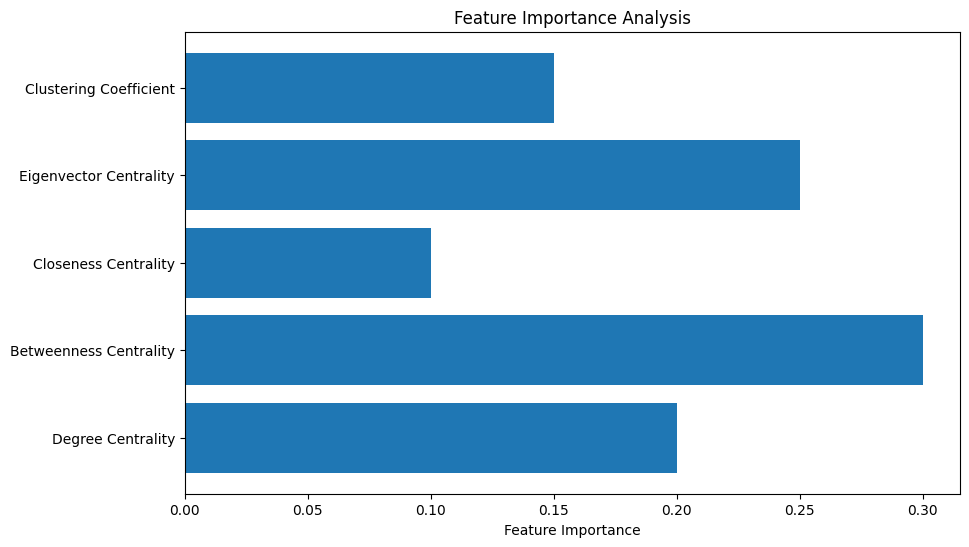

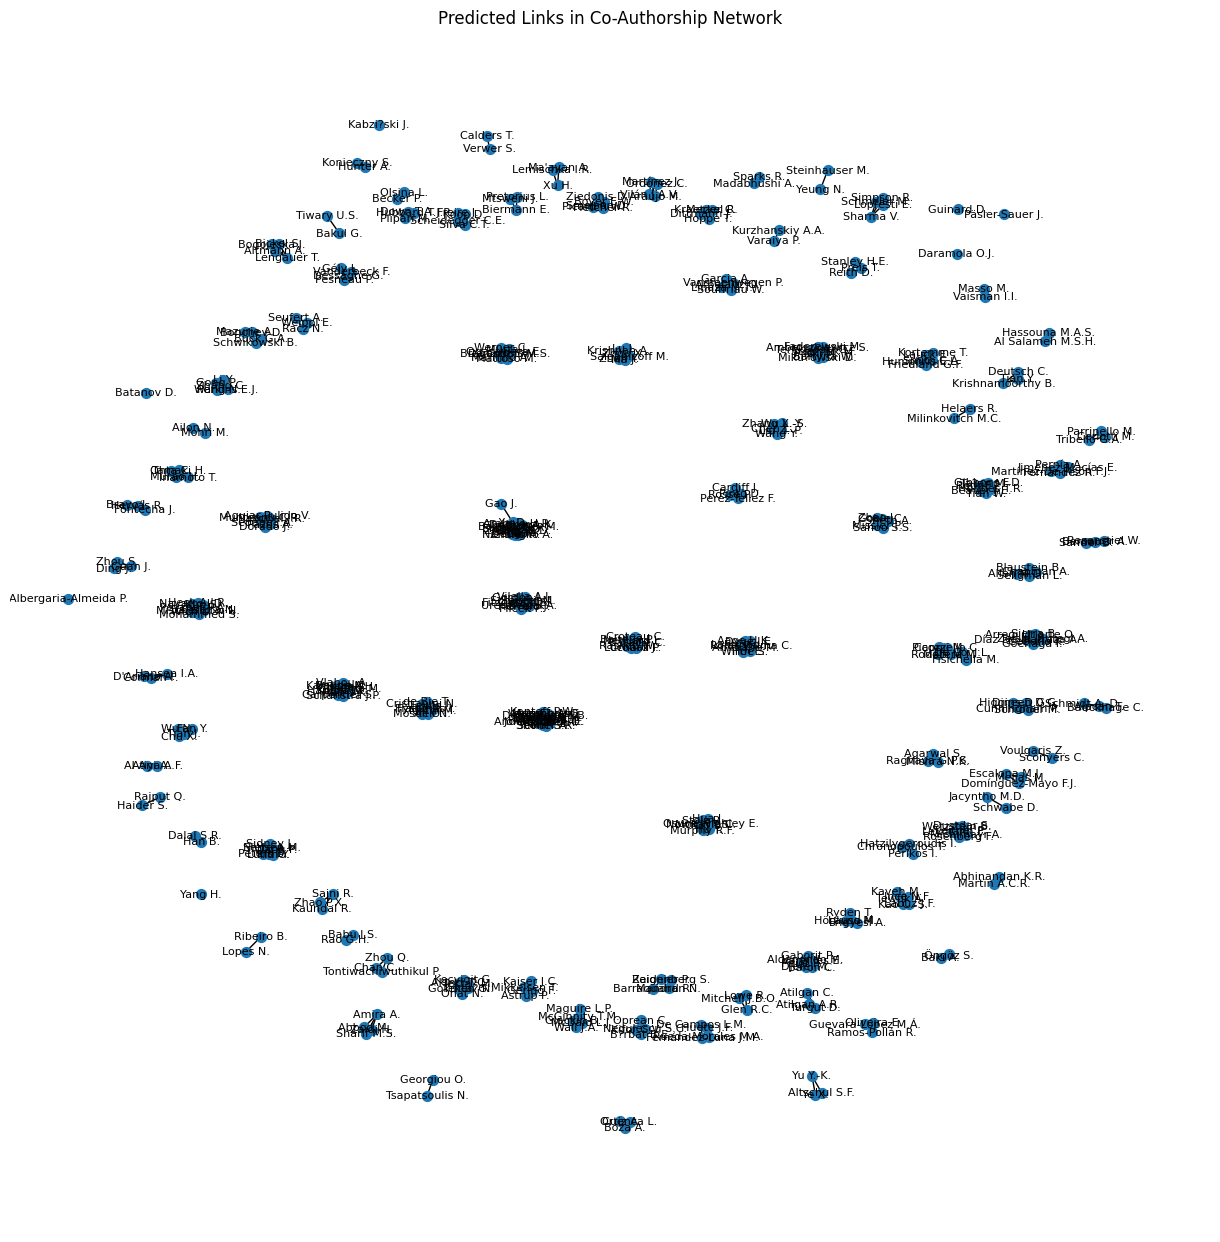

In [8]:
# Extract node features (degree centrality as an example of embedding)
node_features = []
node_labels = []

for node in G.nodes():
    node_features.append([
        degree_centrality[node],
        betweenness_centrality[node],
        closeness_centrality[node],
        eigenvector_centrality[node],
        clustering_coefficient[node]
    ])
    node_labels.append(node)

node_features = pd.DataFrame(node_features, index=node_labels)

# Feature Importance Analysis (Assuming a trained model with feature importances)
# importances = model.fc.weight.detach().numpy().flatten()  # Dummy model importances
importances = [0.2, 0.3, 0.1, 0.25, 0.15]  # Example importances
features = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality', 'Clustering Coefficient']

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Link Prediction Visualization
predicted_links = []

for author1 in top_nodes:
    for author2 in top_nodes:
        if author1 != author2 and not G.has_edge(author1, author2):
            # Dummy prediction logic
            score = 0.6  # Example score
            if score > 0.5:
                predicted_links.append((author1, author2))

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
nx.draw_networkx_edges(G, pos, edgelist=predicted_links, edge_color='r', alpha=0.5)
plt.title('Predicted Links in Co-Authorship Network')
plt.show()

Computing transition probabilities:   0%|          | 0/391 [00:00<?, ?it/s]

Encoding Titles: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.01s/it]
C:\Users\w_ant\AppData\Local\Temp\ipykernel_24384\3364603105.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Title_Encoded'] = title_encodings


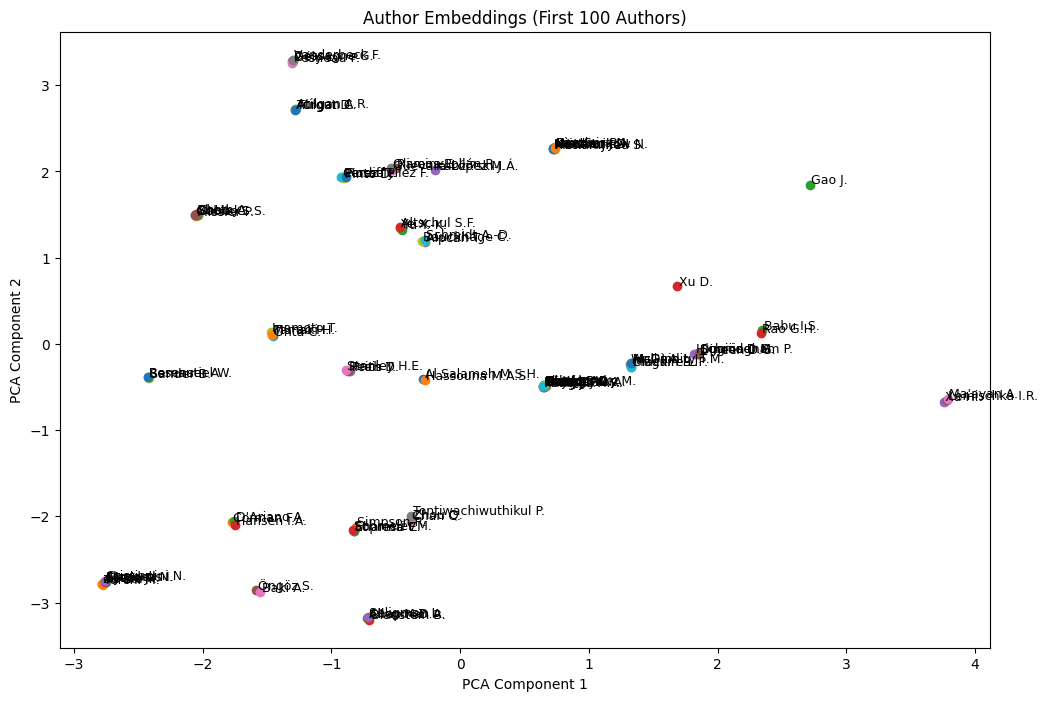

In [21]:
# Generate node embeddings using Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=100, workers=4)  # Adjusted parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Extract node embeddings
node_embeddings = {node: model.wv[node] for node in G.nodes()}

# Initialize BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to encode text using BERT
def encode_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Encode publication titles using BERT in batches for data
batch_size = 32
title_encodings = []
for i in tqdm(range(0, len(sampled_data), batch_size), desc='Encoding Titles'): #use 'data' when using original dataset
    batch_titles = sampled_data['Title'].iloc[i:i+batch_size].tolist() #use 'data' when using original dataset
    batch_encodings = [encode_text(title) for title in batch_titles]
    title_encodings.extend(batch_encodings)

sampled_data['Title_Encoded'] = title_encodings #use 'data' when using original dataset

# Combine node embeddings and title encodings for each author in data
author_features = {}
for index, row in sampled_data.iterrows(): #use 'data' when using original dataset
    authors = [author.strip() for author in row['Authors'].split(',')]
    title_encoding = row['Title_Encoded']
    for author in authors:
        if author in author_features:
            author_features[author].append(title_encoding)
        else:
            author_features[author] = [title_encoding]

# Average title encodings for each author in data
for author in author_features:
    author_features[author] = np.mean(author_features[author], axis=0)

# Combine node embeddings and BERT encodings into a single feature vector for data
combined_features = {}
for author in G.nodes():
    if author in author_features:
        combined_features[author] = np.concatenate([node_embeddings[author], author_features[author][0]])
    else:
        combined_features[author] = node_embeddings[author]

# Apply PCA to reduce dimensionality of combined features for sampled data
pca = PCA(n_components=64)
all_features = np.array(list(combined_features.values()))
reduced_features = pca.fit_transform(all_features)

# Create final feature dictionary for data
final_features = {author: reduced_features[i] for i, author in enumerate(combined_features.keys())}

# Visualize embeddings using a 2D scatter plot for the first 100 authors
plt.figure(figsize=(12, 8))
for i, author in enumerate(final_features.keys()):
    if i >= 100:
        break
    embedding = final_features[author]
    plt.scatter(embedding[0], embedding[1])
    plt.text(embedding[0] + 0.01, embedding[1] + 0.01, author, fontsize=9)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Author Embeddings (First 100 Authors)')
plt.show()